In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
# Load the data
df = pd.read_csv("Credit Card Customer Data.csv")
df_num = df.drop(columns=["Sl_No", "Customer Key"])

# Basic describe
description = df_num.describe()

means = df_num.mean()
medians = df_num.median()
stds = df_num.std()
skews = df_num.skew()
kurts = df_num.apply(stats.kurtosis)

# Print out statistics
print("Basic Describe:\n", description)
print("\nMeans:\n", means)
print("\nMedians:\n", medians)
print("\nStandard Deviations:\n", stds)
print("\nSkewness:\n", skews)
print("\nKurtosis:\n", kurts)

Basic Describe:
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max         

In [3]:
def plot_categorical_bar(df):
    """
    Create a categorical bar chart showing the average credit limit 
    grouped by total number of credit cards.
    """
    plt.figure(figsize=(8, 6))
    category_means = df.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].mean().sort_index()
    category_means.plot(kind='bar', color='cadetblue', edgecolor='black')
    plt.xlabel('Total Credit Cards', fontsize=12)
    plt.ylabel('Average Credit Limit', fontsize=12)
    plt.title('Average Credit Limit by Total Number of Credit Cards', fontsize=14)
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_relational_scatter(df, x_col='Total_visits_online', y_col='Total_calls_made'):
    """
    Create a relational scatter plot between two numerical variables.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], color='darkblue', alpha=0.7, edgecolors='black')
    plt.xlabel(x_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(y_col.replace('_', ' ').title(), fontsize=12)
    plt.title(f'{x_col.replace("_"," ").title()} vs {y_col.replace("_"," ").title()}', fontsize=14)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_statistical_heatmap(df):
    """
    Create a heatmap showing the correlation matrix of the numeric DataFrame.
    """
    corr = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True,
                cbar_kws={"shrink": .8}, annot_kws={"size": 10})
    plt.title('Correlation Heatmap', fontsize=14)
    plt.xticks(fontsize=11, rotation=45, ha='right')
    plt.yticks(fontsize=11, rotation=0)
    plt.tight_layout()
    plt.show()

In [6]:
def perform_kmeans_clustering(df, n_clusters):
    """
    Perform K-Means clustering on the given DataFrame (after normalization).
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df.values)
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_scaled)
    return model, labels, X_scaled, scaler

In [7]:
def plot_elbow_silhouette(df, max_k=6):
    """
    Plot the elbow method and print silhouette scores to determine optimal clusters.
    """
    X_scaled = StandardScaler().fit_transform(df.values)
    wcss = []
    silhouette_scores = {}

    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        wcss.append(kmeans.inertia_)
        silhouette_scores[k] = silhouette_score(X_scaled, labels)

    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k+1), wcss, marker='o', color='navy')
    plt.title('Elbow Plot for K-Means', fontsize=14)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()

    # Print silhouette scores
    print("Silhouette Scores:")
    for k, score in silhouette_scores.items():
        print(f"k={k}: {score:.3f}")

In [8]:
def plot_clusters(df, model, labels, X_scaled, scaler):
    """
    Plot the clusters formed by K-Means on the first two principal components.
    """
    # For visualization, we can just pick first two features or do PCA.
    # Here, let's just pick the first two columns after scaling for a simple demonstration.
    x_vals = X_scaled[:, 0]
    y_vals = X_scaled[:, 1]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_vals, y=y_vals, hue=labels, palette='Set2', edgecolor='black', s=100)
    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centers', edgecolors='black')
    plt.xlabel('Feature 1 (Scaled)', fontsize=12)
    plt.ylabel('Feature 2 (Scaled)', fontsize=12)
    plt.title('K-Means Clusters', fontsize=14)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

In [9]:
def predict_cluster(model, scaler, new_data):
    """
    Predict cluster membership for new data points using the trained KMeans model.
    """
    new_data = np.array(new_data)
    new_data_scaled = scaler.transform(new_data)
    labels = model.predict(new_data_scaled)
    return labels

In [10]:
def fit_linear_model(df, x_col='Avg_Credit_Limit', y_col='Total_calls_made'):
    """
    Fit a linear regression model to the data.
    """
    X = df[[x_col]].values
    y = df[y_col].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    residuals = y - y_pred
    dof = len(y) - 2
    residual_var = np.sum(residuals**2) / dof
    std_err = np.sqrt(residual_var / np.sum((X - X.mean())**2))

    return model, X, y, y_pred, std_err

In [11]:
def plot_fitted_line(X, y, y_pred, std_err, x_label='Avg Credit Limit', y_label='Total Calls Made'):
    """
    Plot the data points and the fitted regression line with error bars (confidence intervals)
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.7, edgecolors='black', label='Data')
    plt.plot(X, y_pred, color='red', label='Fitted Line')

    # For confidence intervals, let's do a simple +/- 2*std_err for demonstration
    upper = y_pred + 2 * std_err
    lower = y_pred - 2 * std_err
    plt.fill_between(X.flatten(), lower, upper, color='pink', alpha=0.3, label='~95% CI')

    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title('Linear Regression Fit with Confidence Interval', fontsize=14)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

In [12]:
def predict_linear_model(model, new_X):
    """
    Predict using the linear model for new unseen data points.
    Returns Predicted values for the new data.
    """
    new_X = np.array(new_X).reshape(-1, 1)
    y_new_pred = model.predict(new_X)
    return y_new_pred

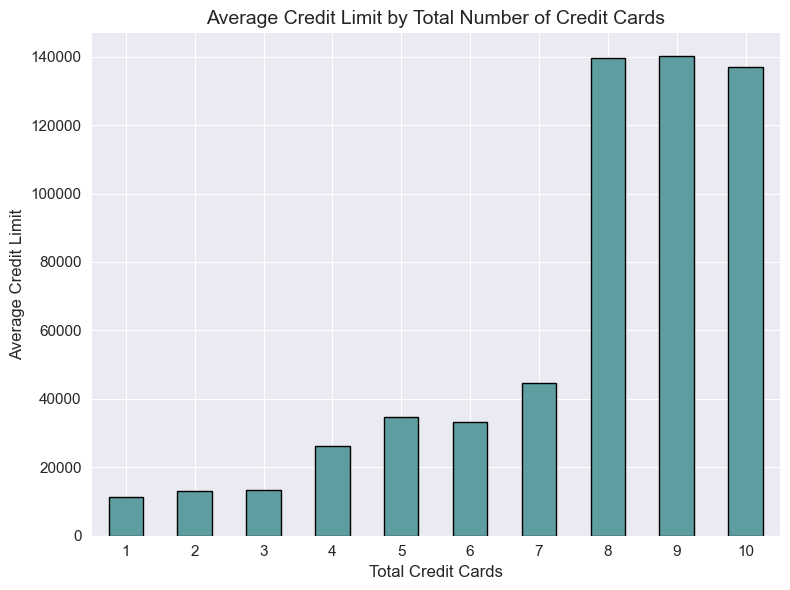

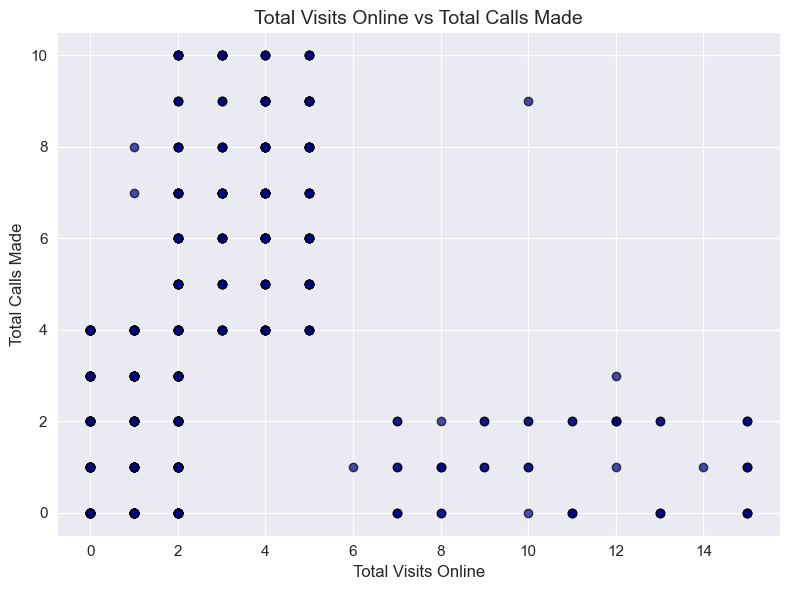

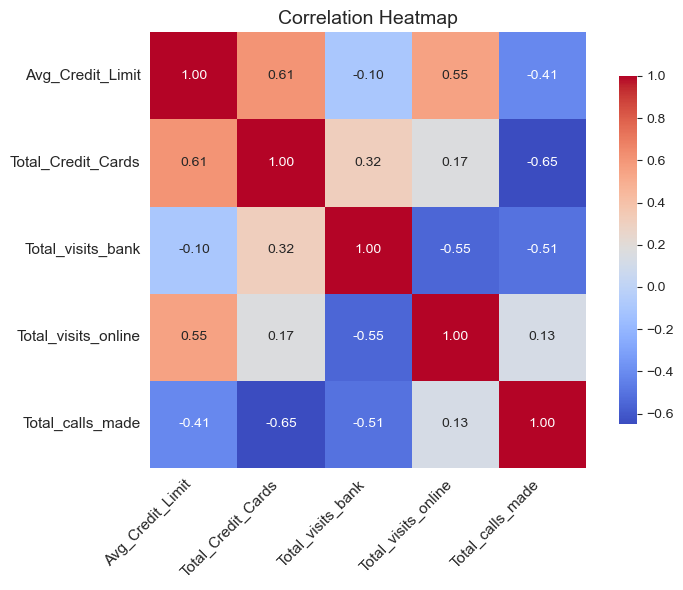

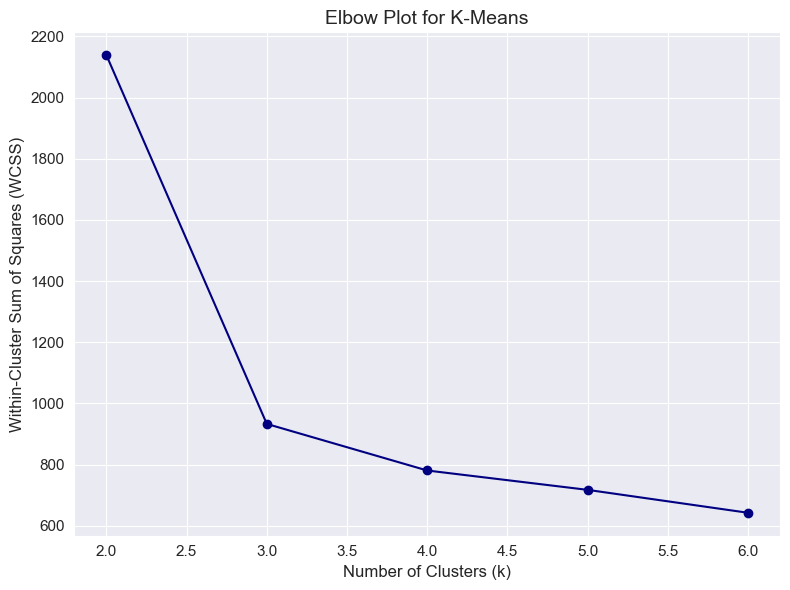

Silhouette Scores:
k=2: 0.570
k=3: 0.516
k=4: 0.356
k=5: 0.332
k=6: 0.257


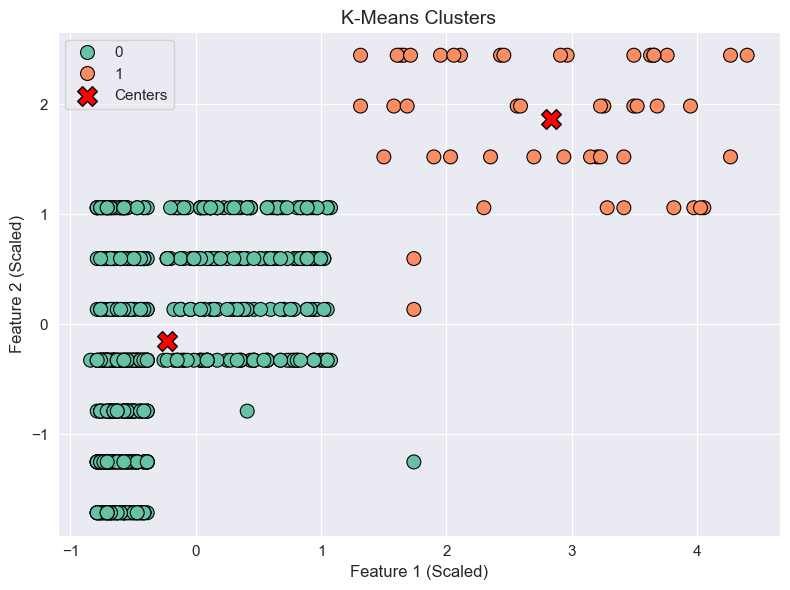

Predicted clusters for new points: [0 0]


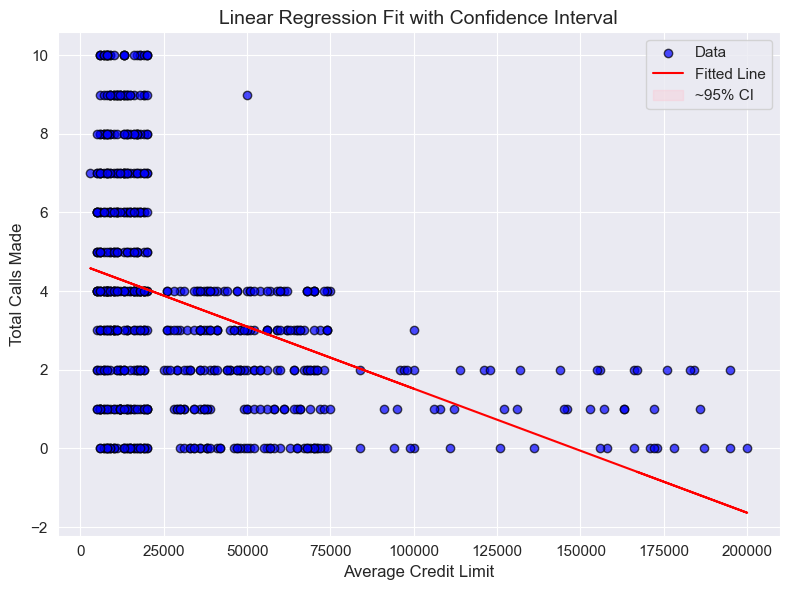

Predictions for new Average Credit Limits: [(25000, 3.8854427465033927), (75000, 2.307723070191956), (120000, 0.8877753615116628)]


In [13]:
##############################################
#              MAIN EXECUTION
##############################################
if __name__ == "__main__":
    # Plot the categorical graph (Bar Chart)
    plot_categorical_bar(df_num)

    # Plot the relational graph (Scatter)
    plot_relational_scatter(df_num, x_col='Total_visits_online', y_col='Total_calls_made')

    # Plot the statistical graph (Heatmap)
    plot_statistical_heatmap(df_num)

    # Clustering: Check elbow & silhouette scores
    plot_elbow_silhouette(df_num) 
    k = 2
    model, labels, X_scaled, scaler = perform_kmeans_clustering(df_num, n_clusters=k)

    # Add cluster labels to df_num
    df_num['Cluster'] = labels

    # Plot the clusters
    plot_clusters(df_num, model, labels, X_scaled, scaler)

    # Predict cluster for new points
    new_points = [[50000, 3, 1, 2, 4],
                  [20000, 2, 0, 0, 0]]
    new_clusters = predict_cluster(model, scaler, new_points)
    print("Predicted clusters for new points:", new_clusters)

    # Fit a linear model
    lin_model, X, y, y_pred, std_err = fit_linear_model(df_num, x_col='Avg_Credit_Limit', y_col='Total_calls_made')
    plot_fitted_line(X, y, y_pred, std_err, x_label='Average Credit Limit', y_label='Total Calls Made')

    # Predict new values for fitting
    new_credit_limits = [25000, 75000, 120000]
    y_new_preds = predict_linear_model(lin_model, new_credit_limits)
    print("Predictions for new Average Credit Limits:", list(zip(new_credit_limits, y_new_preds)))
